# Implementing a Simple Neural Network with Numpy

Based on CS231n notes [here](http://cs231n.github.io/neural-networks-case-study/)

In [1]:
import sys
sys.version

'3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

In [3]:
debug = False

### Hyperparameters ###

# N is number of samples
# D_in in input dimension
# D_h is hidden dimension
# D_out is output dimension

# start out small
N, D_in, D_hid, D_out = 50, 2, 10, 2
learning_rate = 1e-2

### Data ###
X, y = make_blobs(n_samples=N, centers=2, n_features=D_in,
                  random_state=0)

### Weights ###
w1 = np.random.randn(D_in, D_hid)
w2 = np.random.randn(D_hid, D_out)

if debug:
    print('X: ', X)
    print('y: ', y)
    print('w1: ', w1)
    print('w2: ', w2)

# Vector to which loss over training is saved
loss_vec = []

# Epochs
epochs = 100

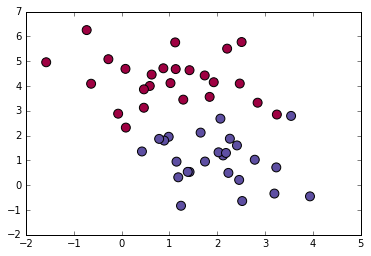

In [4]:
### Visualize data ###
plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=plt.cm.Spectral)
plt.show()

In [5]:
### Train neural net ###
for t in range(epochs):
    ### Forward pass ###
    h = X.dot(w1)
    # Apply an activation function (ReLU) to the output of first layer
    h_relu = np.maximum(0, h)
    # Predict with these weights
    y_pred = np.array([np.argmax(x) for x in h_relu.dot(w2)]).reshape(-1, 1)
    
    ### Loss ###
    # - calculates the error in the network, Meas Square Error, here (or MSE)
    # - different loss functions are used for different tasks
    # - in general, this process is done until the loss has reached a minima
    
    scores = np.dot(h_relu, w2)
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(N), y])
    loss = np.sum(corect_logprobs)/N
    
    # compute the gradient on scores
    dscores = probs
    dscores[range(N), y] -= 1
    dscores /= N
    
    ### Backpropagation  ###
    # - gradients of w1 and w2 with respect to loss
    # - typically a gradient is the partial derivative of
    #   the loss function with respect to the weights
    # - normally an optimization function is used to calculate the graidents
    
    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dw2 = np.dot(h_relu.T, dscores)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, w2.T)
    # backprop the ReLU non-linearity
    dhidden[h_relu <= 0] = 0
    # finally into w
    dw = np.dot(X.T, dhidden)
    
    ### Updates to weights ###
    # - typically weigts are modified according to an optimization function
    # - the gradient gives the direction and, the learning rate, equates to
    #   the size of the step
    # - weights are modified in the opposite direction of the gradient
    w1 -= learning_rate * dw
    w2 -= learning_rate * dw2
    
    if debug:
        print('Forward pass:', h)
        print('Activation function:', h_relu)
        print('Current prediction:', y_pred)
        print('Loss:', t, loss)
        print('New weights 1: ', w1, '\n', 'New weights 2: ', w2)
        
    loss_vec.append(loss)

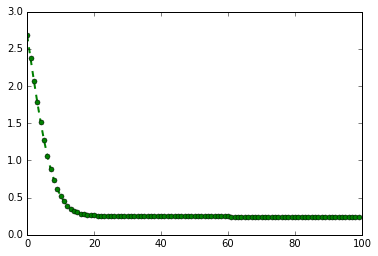

In [6]:
plt.plot(range(epochs), loss_vec, 'go--', linewidth=2, markersize=5)

## Further Reading

1. Nice article on loss functions and optimization/optimizers [Ref](https://medium.com/data-science-group-iitr/loss-functions-and-optimization-algorithms-demystified-bb92daff331c)